In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table

import cmasher as cmr

# Exploring the data set

In [274]:
df = pd.read_csv('../data/xSAGA_SDSS_all.csv', dtype={'objID': str})
df.sample(3)

,objID,ra,dec,g0,r0,R_eff
201659,1237650760242102511,177.810096,-3.684729,20.11405,19.62263,1.618774
383917,1237651696544580306,193.199531,-23.232990,20.92780,20.44447,1.174965
6056031,1237680247891296563,7.767908,21.132705,20.22837,19.63431,1.426501


In [8]:
df.shape

(6265375, 6)

<AxesSubplot:xlabel='ra', ylabel='dec'>

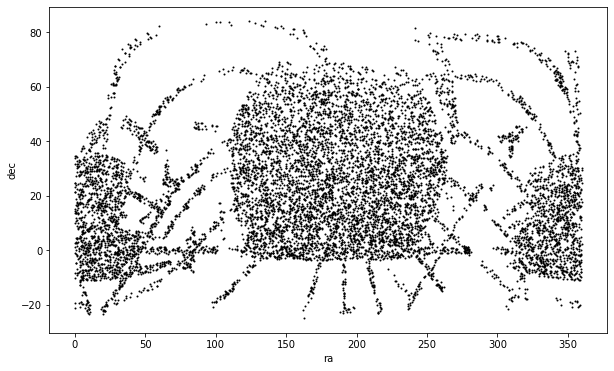

In [9]:
df.sample(10000).plot.scatter('ra', 'dec', c='k', s=1, figsize=(10, 6))

In [10]:
# r-band effective surface brightness
μ_eff = (df.r0 + 2.5*np.log10(2*np.pi*df.R_eff**2))

In [11]:
idxs = np.random.choice(range(len(df)), size=10000, replace=False)

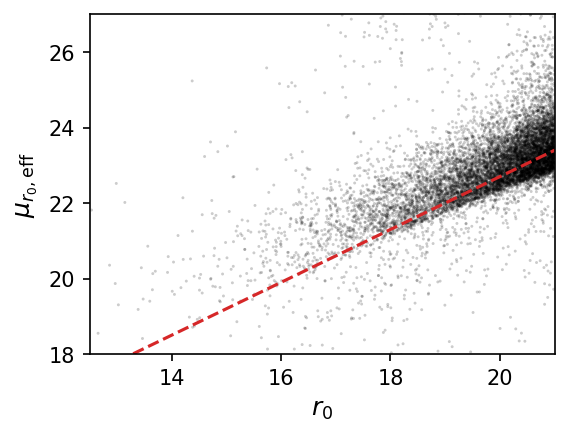

In [41]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(df.r0[idxs], μ_eff[idxs], color='k', s=2, edgecolor='none', alpha=0.2)

x = np.arange(10, 23)
y = 18.5 + 0.7 * (x - 14)
plt.plot(x, y, color='C3', ls='--')

plt.xlim(12.5, 21.0)
plt.ylim(18.0, 27.0)

plt.xlabel(r'$r_0$', fontsize=12)
plt.ylabel(r'$\mu_{r_0,\rm eff}$', fontsize=12);

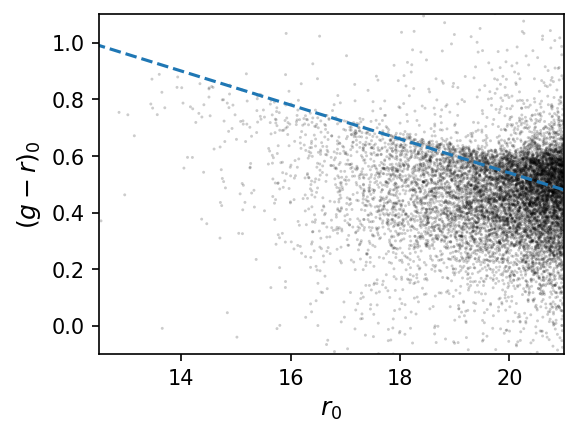

In [44]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(df.r0[idxs], (df.g0 - df.r0)[idxs], color='k', s=2, edgecolor='none', alpha=0.2)

x = np.arange(10, 23)
y = 0.9 - 0.06 * (x - 14) 
plt.plot(x, y, color='C0', ls='--')

plt.xlim(12.5, 21.0)
plt.ylim(-0.1, 1.1)

plt.xlabel(r'$r_0$', fontsize=12)
plt.ylabel(r'$(g-r)_0$', fontsize=12);

# Looking at a few of these

Use Yao's awesome viewer tool: https://yymao.github.io/decals-image-list-tool/

We can also compare against Figure 10 of the SAGA II paper (Mao+2020).

## Random selection

In [50]:
df[['objID', 'ra', 'dec']].sample(10).style.hide_index()

objID,ra,dec
1237661064412266978,140.525204,8.452375
1237668289085571116,159.777531,18.047192
1237673474715616196,72.404988,13.146640
1237662636903760578,220.394491,12.138463
1237670957323649687,21.086388,-8.973119
1237656529460265504,265.484456,49.811018
1237662264324719248,233.120105,7.138240
1237662199886643564,210.298487,11.866509
1237661069781106884,140.590806,10.897355
1237661852010807593,199.532755,44.869672


## Surface brightness cut

In [90]:
sbcut_1 = ((μ_eff - 23.5) - (df.r0 - 20.0) > 0)

sum(sbcut_1)

1870014

In [81]:
df[['objID', 'ra', 'dec']][sbcut_1].sample(10).style.hide_index()

objID,ra,dec
1237666214082511465,22.839498,42.796905
1237666300024783716,64.163948,-0.576213
1237672764440772624,346.445294,23.675921
1237661852538109966,168.547900,44.968118
1237664093441294562,141.833247,31.545643
1237658205040149603,156.954182,46.816056
1237664289387446486,175.376122,13.923404
1237665442054865437,200.679805,29.150441
1237680264523678520,329.077280,-5.417106
1237665126949650702,227.475128,26.153992


For faint systems ($M_{r,0} > -15$), we expect satllites to have $22.0 < \mu_{r_0,\rm eff} < 26.0$ (based on Mao+2020 Fig 10). Unfortunately, this is *not very restrictive*.

In [85]:
sbcut_2 = (22 < μ_eff) & (μ_eff < 26)
sum(sbcut_2)

5056270

In [84]:
df[['objID', 'ra', 'dec']][sbcut_2].sample(10).style.hide_index()

objID,ra,dec
1237678892818497735,28.567412,31.857843
1237655108917788919,198.443213,59.843804
1237662225670603253,162.885110,38.361353
1237662696498856371,234.705839,25.555457
1237657874328715601,139.723560,40.094268
1237660765378642722,139.048869,35.309109
1237671129663078923,176.067991,1.432030
1237678882091041027,352.413081,-1.285040
1237680305324556969,337.669668,23.906227
1237650762393714753,187.206863,-1.946073


## Blue color cut

We expect colors to be in the range $0.1 < (g-r)_0 < 0.7$.

In [86]:
gmrcut = (0.1 < (df.g0 - df.r0)) & ((df.g0 - df.r0) < 0.7)
sum(gmrcut)

5679076

In [88]:
sum(gmrcut & sbcut_2)

4765843

In [87]:
# includes surface brightness *and* color cut
df[['objID', 'ra', 'dec']][sbcut_2 & gmrcut].sample(10).style.hide_index()

objID,ra,dec
1237678622776426776,28.006717,4.535689
1237672842282533558,1.732393,-5.550421
1237662300827877867,224.794216,43.904951
1237662267542864564,240.736716,4.161932
1237668569860801262,246.336964,-3.186393
1237655472359801790,251.665856,36.083865
1237680064803373791,327.886855,-4.878933
1237667254530933563,131.221627,19.100514
1237661949170418111,160.798587,11.003410
1237661433780699891,214.385526,43.031689


In [91]:
sum(gmrcut & sbcut_1)

1555439

In [95]:
df[['objID', 'ra', 'dec']][sbcut_1 & gmrcut].sample(10).style.hide_index()

objID,ra,dec
1237661387074371863,233.082920,46.313991
1237667430105022603,167.850311,26.240819
1237661958836060775,216.685861,48.023372
1237652936182137213,320.979683,-6.352373
1237659132212478179,228.053148,46.129403
1237668503296344330,253.618029,47.790356
1237658491212071540,195.007310,8.685449
1237670458037502281,35.534815,19.956932
1237664869209866490,133.067132,33.473400
1237667212652118419,124.311417,16.780299


# Compare to NSA catalogs

In [98]:
nsa = fits.getdata(f"../data/nsa_v1_0_1.fits")

In [99]:
nsa.columns

ColDefs(
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ISDSS'; format = 'J'
    name = 'INED'; format = 'J'
    name = 'ISIXDF'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'IZCAT'; format = 'J'
    name = 'ITWODF'; format = 'J'
    name = 'MAG'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'ZSRC'; format = '7A'
    name = 'SIZE'; format = 'E'
    name = 'RUN'; format = 'I'
    name = 'CAMCOL'; format = 'B'
    name = 'FIELD'; format = 'I'
    name = 'RERUN'; format = '3A'
    name = 'XPOS'; format = 'E'
    name = 'YPOS'; format = 'E'
    name = 'NSAID'; format = 'J'
    name = 'ZDIST'; format = 'E'
    name = 'SERSIC_NMGY'; format = '7E'
    name = 'SERSIC_NMGY_IVAR'; format = '7E'
    name = 'SERSIC_OK'; format = 'I'
    name = 'SERSIC_RNMGY'; format = '7E'
    name = 'SERSIC_ABSMAG'; format = '7E'
    name = 'SERSIC_AMIVAR'; format = '7E'
    name = 'EXTINCTIO

(array([  7729.,  31106.,  55248.,  64073.,  81723., 101142.,  78702.,
         81639.,  74686.,  65361.]),
 array([-0.00448154,  0.01096657,  0.02641468,  0.04186279,  0.0573109 ,
         0.07275901,  0.08820712,  0.10365523,  0.11910334,  0.13455145,
         0.14999956], dtype=float32),
 <BarContainer object of 10 artists>)

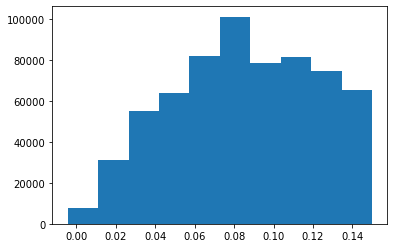

In [101]:
plt.hist(nsa['Z'])

In [104]:
nsa = nsa[(nsa['Z'] > 0.003) & (nsa['Z'] < 0.013)]

In [105]:
len(nsa)

7769

In [117]:
saga_hosts = pd.read_csv('../data/saga_stage2_hosts.csv')
saga_sats = pd.read_csv('../data/saga_stage2_sats.csv')

In [118]:
saga_hosts.columns

Index(['COMMON_NAME', 'SAGA_NAME', 'RA', 'DEC', 'HRV', 'DIST', 'M_K',
       'PHOT_COVERAGE', 'SPEC_COVERAGE', 'N_SAT', 'N_SAT_BELOW_LIMIT',
       'N_SAT_POTENTIAL', 'INTERNAL_HOSTID'],
      dtype='object')

## Overlay SAGA hosts/sats on NSA.

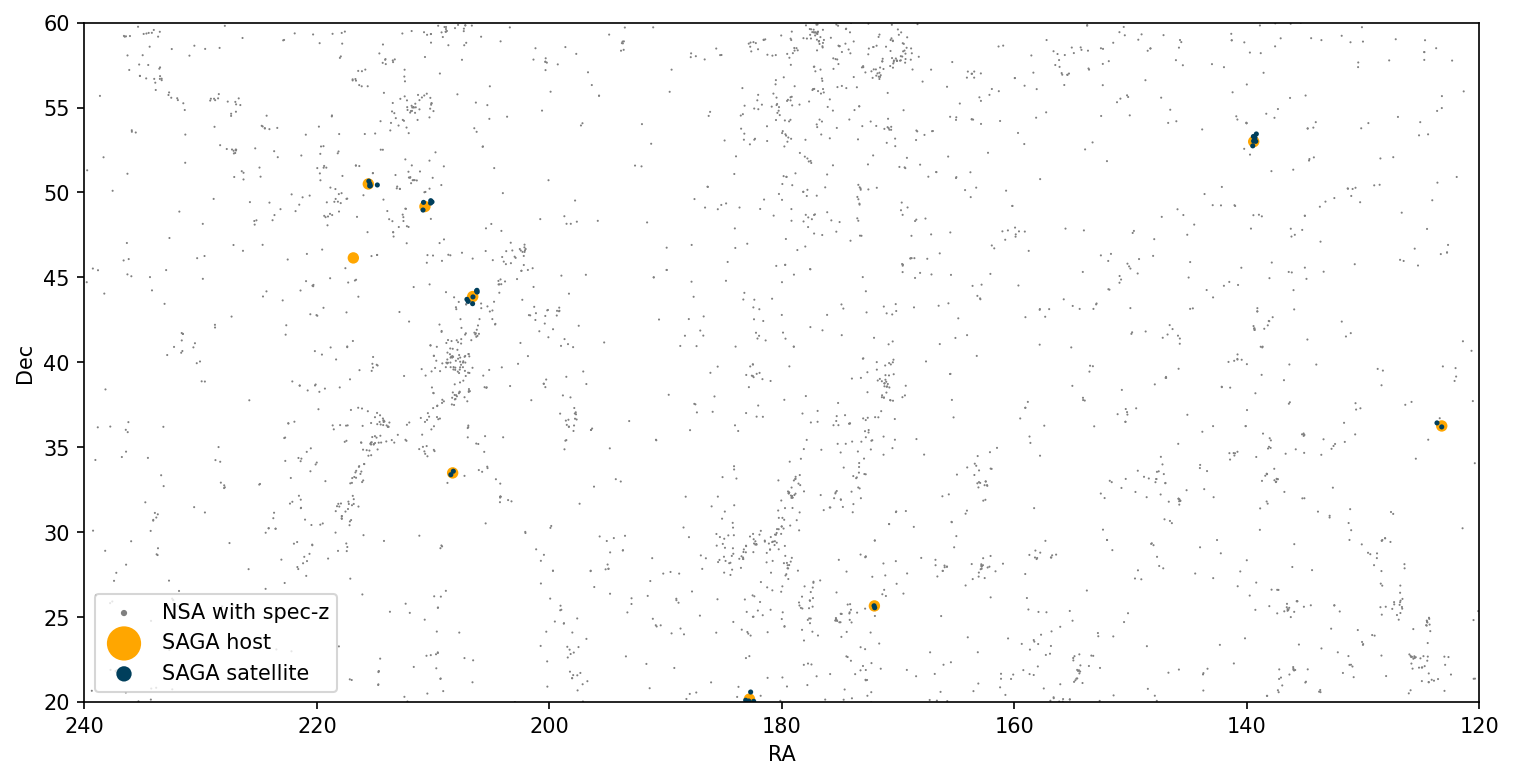

In [148]:
plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(nsa['RA'], nsa['DEC'], c='gray', edgecolor='none', s=1, label='NSA with spec-z')
plt.xlim(240, 120)
plt.ylim(20, 60)

plt.scatter(saga_hosts.RA, saga_hosts.DEC, c='#ffa600', edgecolor='none', s=30, label='SAGA host')
plt.scatter(saga_sats.RA, saga_sats.DEC, c='#003f5c', edgecolor='none', s=6, label='SAGA satellite')

plt.xlabel('RA')
plt.ylabel('Dec')
plt.legend(markerscale=3);

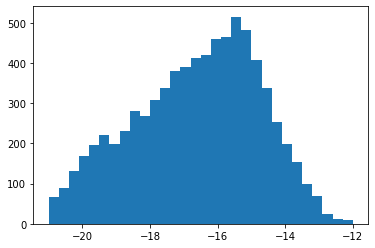

In [149]:
nsa_mag = nsa.ELPETRO_ABSMAG[:, 4]
plt.hist(nsa_mag, range=[-21, -12], bins=30);

## Show just NSA galaxies

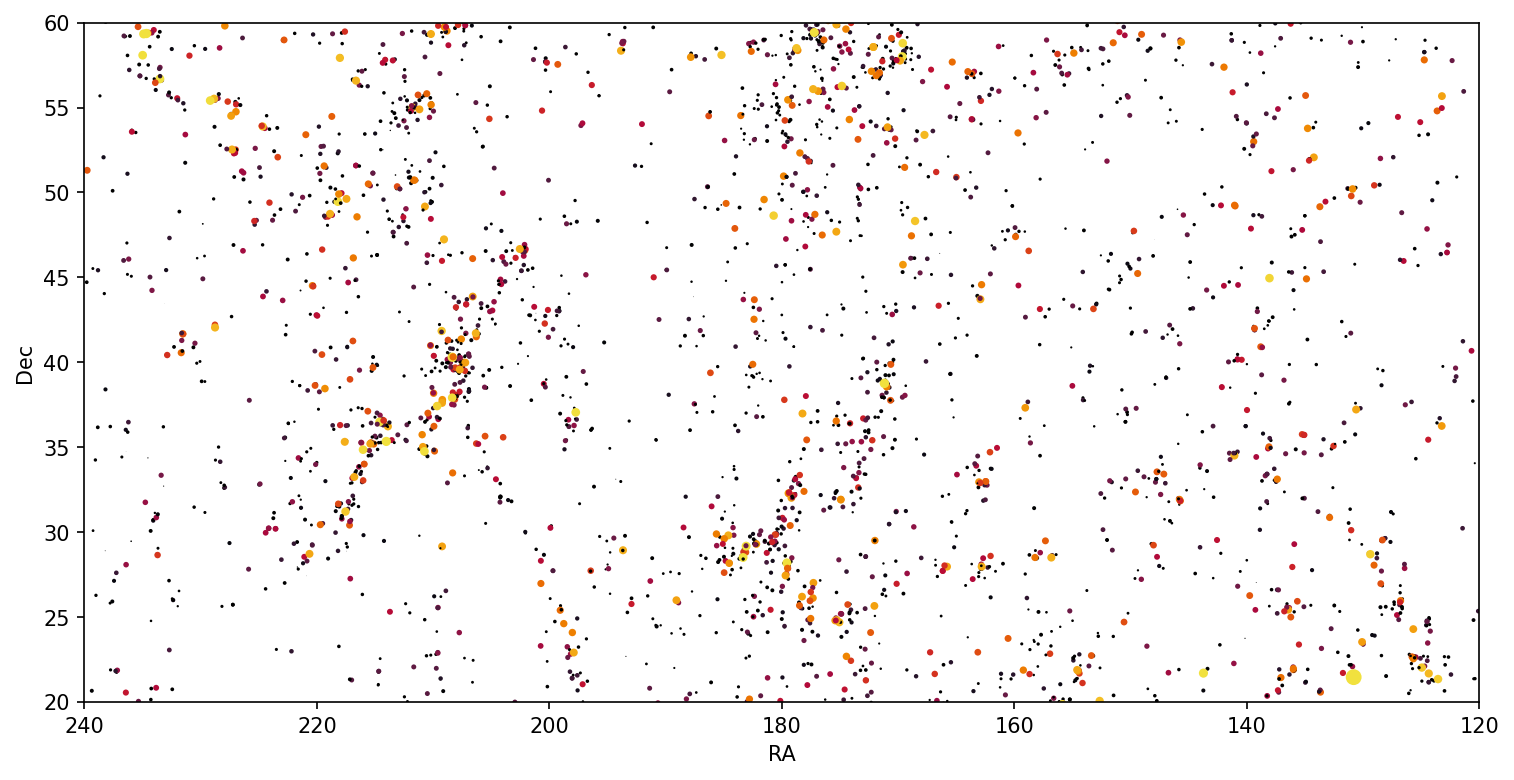

In [207]:
plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(nsa['RA'], nsa['DEC'], c=nsa_mag, edgecolor='none', s=(nsa_mag/13)**6, label='NSA with spec-z', cmap='cmr.ember_r', vmin=-21, vmax=-16)
plt.xlim(240, 120)
plt.ylim(20, 60)

plt.xlabel('RA')
plt.ylabel('Dec');

# Zooming in on a particular host

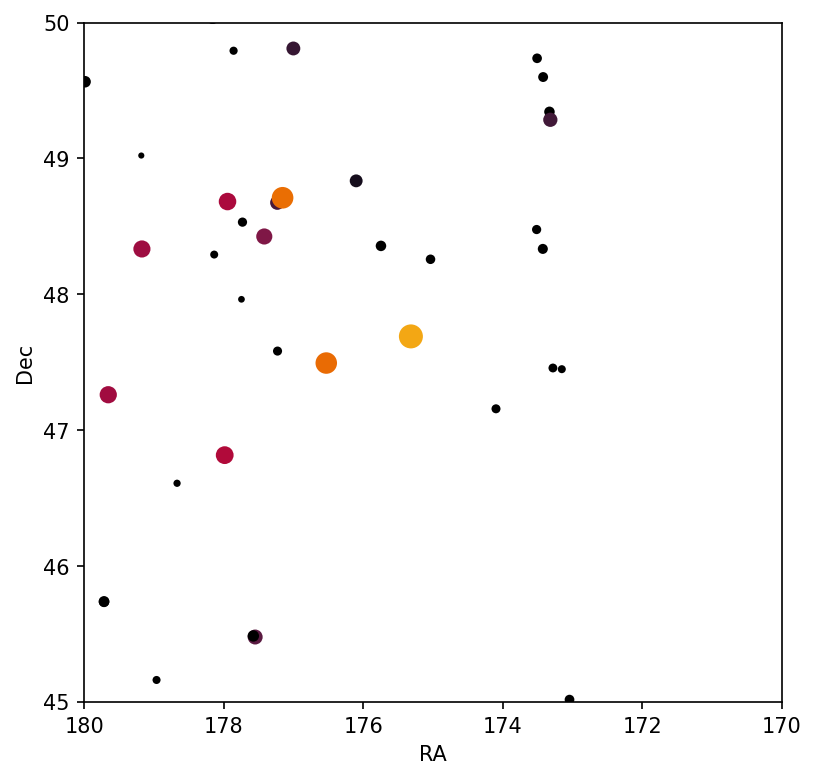

In [206]:
plt.figure(figsize=(6, 6), dpi=150)
plt.scatter(nsa['RA'], nsa['DEC'], c=nsa_mag, edgecolor='none', s=(nsa_mag/9)**6, label='NSA with spec-z', cmap='cmr.ember_r', vmin=-21, vmax=-16)
plt.xlim(180, 170)
plt.ylim(45, 50)

plt.xlabel('RA')
plt.ylabel('Dec');

## Focusing on NSAID 627160, or NGC 3811

In [210]:
coord = [175, 47.5]

nsaid = nsa[np.argmin((nsa['RA']-coord[0])**2 + (nsa['DEC']-coord[1])**2)]['NSAID']
nsaid

627160

In [209]:
nsa[nsa['NSAID'] == nsaid]

FITS_rec([('J114117.79+474113.9', '11h/p46/J114117.79+474113.9', 175.3192822, 47.69081537, -1, 106385, -1, -1, -1, -1, 18.2, 0.01054064, 'ned', 0.1, 3698, 5, 126, '301', 1642.1239, 809.7988, 627160, 0.01054042, [    0.   ,     0.   ,  2787.009,  9649.283, 18511.55 , 25787.479, 32726.514], [0.0000000e+00, 0.0000000e+00, 6.0353148e-05, 3.1549258e-05, 8.5858192e-06, 4.4235412e-06, 1.2195862e-06], 1, [  304.50256,   652.9822 ,  2763.525  ,  9715.012  , 18502.268  , 25293.012  , 33713.203  ], [-16.228798, -17.066109, -18.660538, -19.99559 , -20.695192, -21.052616, -21.309387], [   0.     ,    0.     ,  397.67474, 2491.9    , 2495.8508 , 2495.394  , 1108.06   ], [0.15841879, 0.15631674, 0.09851012, 0.07248281, 0.05257058, 0.03986268, 0.02826313], [0.00384876, 0.01288422, 0.0317185 , 0.01837997, 0.01061465, 0.00812079, 0.0061652 ], [1.10459293e-03, 5.78089860e-08, 1.00095145e-04, 2.74744909e-03, 4.79954324e-05], [2.0842992e-04, 3.3755916e-01, 2.1502204e+00, 1.9872093e+00, 1.6334243e+00, 1.328

In [211]:
nsa[nsa['NSAID'] == nsaid]['ELPETRO_ABSMAG']

array([[-16.546122, -17.429192, -18.716295, -19.792353, -20.326551,
        -20.6082  , -20.784327]], dtype=float32)

## Get all SAGA-selected SDSS objects around this galaxy

In [215]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [223]:
coords = SkyCoord(ra=df.ra.values*u.deg, dec=df.dec.values*u.deg)

In [224]:
host_radec = SkyCoord(ra=175.3192822*u.deg, dec=47.69081537*u.deg)

In [228]:
idx = host_radec.separation(coords) < 1*u.deg
sum(idx)

1496

In [275]:
ngc3811_targets = df.iloc[idx]
ngc3811_targets.sample(5)

,objID,ra,dec,g0,r0,R_eff
1715991,1237660636001075372,174.677783,47.370053,18.68248,18.15300,2.149005
1716918,1237660636001665303,176.502496,47.538847,18.29352,18.03348,16.811100
1488626,1237658611445858517,175.538344,48.355445,19.87374,19.47283,1.516663
1925067,1237661357004620101,175.236603,46.715593,21.31175,20.75865,1.257182
1711404,1237660635464532535,175.854662,46.955181,20.56725,20.10706,1.515047


<AxesSubplot:xlabel='ra', ylabel='dec'>

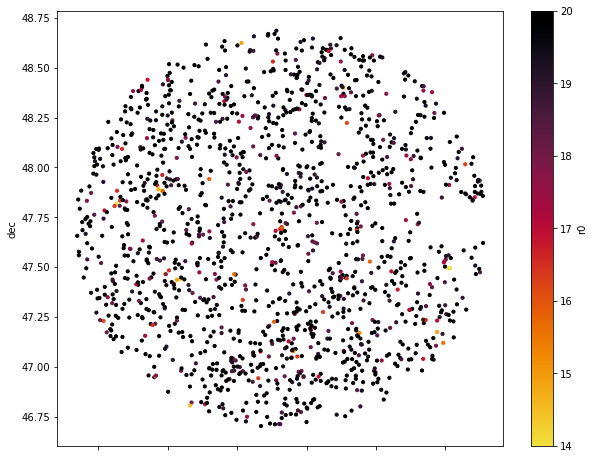

In [249]:
ngc3811_targets.plot.scatter('ra', 'dec', s=10, c='r0', cmap='cmr.ember_r', vmin=14, vmax=20, figsize=(10, 8))

In [327]:
# ngc3811_targets.to_csv(f'../results/NSA_{nsaid}/targets.csv', index=False)

Downloaded images to `../results/NSA_627160/images`

## Testing trained model on these targets

In [255]:
from fastai.basics import *
from fastai.vision.all import *

In [270]:
model = xse_resnext18(n_out=2, sa=True, act_cls=Mish)
model.load_state_dict(torch.load(
    f'../models/SAGA-legacy-xse_xresnet18.pth', 
    map_location=torch.device('cpu')
))
m = model.eval()

In [279]:
legacy_image_stats = [np.array([0.14814416, 0.14217226, 0.13984123]), np.array([0.0881476 , 0.07823102, 0.07676626])]

item_tfms = [Resize(224)]
batch_tfms = (
    aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + 
    [Normalize.from_stats(*legacy_image_stats)]
)

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader(['objID'], pref=f'../results/NSA_{nsaid}/images/', suff='.jpg'),
    get_y=ColReader(['r0']),          # filler variable --
    splitter=RandomSplitter(0),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
)

In [280]:
dls = ImageDataLoaders.from_dblock(dblock, ngc3811_targets, bs=128)


In [286]:
learn = Learner(dls, m, )

In [303]:
fnames = np.array([f'../results/NSA_{nsaid}/images/{objID}.jpg' for objID in ngc3811_targets.objID])

In [325]:
test_dl = dls.test_dl(fnames)
test_dl.bs = 8

In [328]:
preds = learn.get_preds(dl=test_dl)

In [343]:
from IPython.display import display

In [356]:
p_sat

tensor(0.0251)

In [375]:
ngc3811 = ngc3811_targets.copy()
ngc3811['p_sat'] = preds[0][:, 1]

ngc3811.to_csv(f'../results/NSA_{nsaid}/targets.csv', index=False)

1237658611445858731    p_sat = 0.971
  RA = 175.57560    Dec = 48.49168


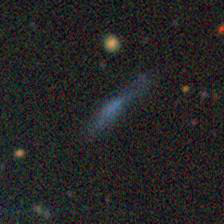

1237658611445858753    p_sat = 0.954
  RA = 175.59273    Dec = 48.52394


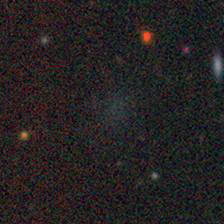

1237660636001075217    p_sat = 0.973
  RA = 174.58811    Dec = 47.43734


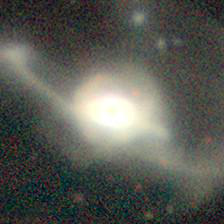

1237660636001665059    p_sat = 0.833
  RA = 176.53249    Dec = 47.49475


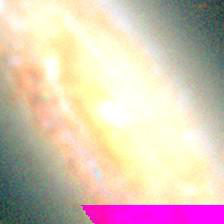

1237660636001665064    p_sat = 0.912
  RA = 176.52443    Dec = 47.49291


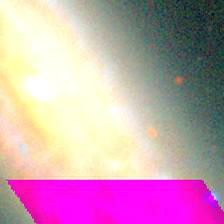

1237660636537880762    p_sat = 0.953
  RA = 174.20117    Dec = 47.82924


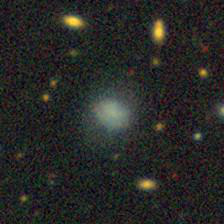

1237660637075079386    p_sat = 0.976
  RA = 175.22922    Dec = 48.26700


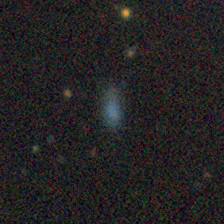

1237660637075210367    p_sat = 0.888
  RA = 175.77489    Dec = 48.35732


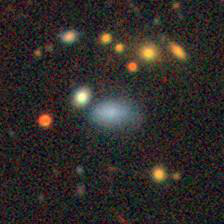

1237660637075210464    p_sat = 0.973
  RA = 175.74852    Dec = 48.35678


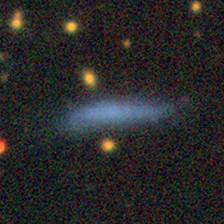

1237660637075276053    p_sat = 0.880
  RA = 175.90805    Dec = 48.36017


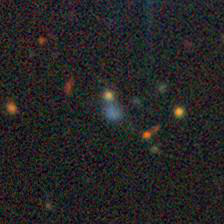

1237660636538077548    p_sat = 0.946
  RA = 174.95197    Dec = 47.80446


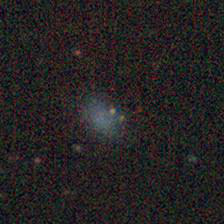

1237660637075013862    p_sat = 0.860
  RA = 175.13152    Dec = 48.26011


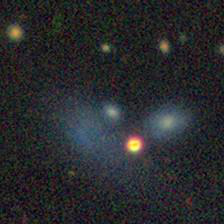

1237660637075407269    p_sat = 0.879
  RA = 176.43227    Dec = 48.31980


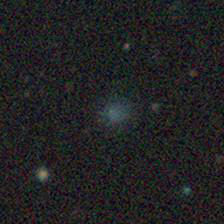

1237661358078296267    p_sat = 0.970
  RA = 174.86521    Dec = 47.57042


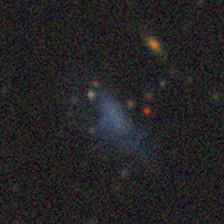

1237661358078427192    p_sat = 0.974
  RA = 175.31928    Dec = 47.69081


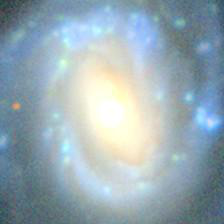

1237661358078427195    p_sat = 0.965
  RA = 175.32040    Dec = 47.70045


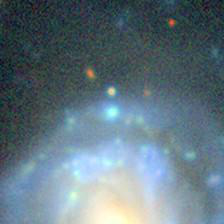

1237661358078427196    p_sat = 0.966
  RA = 175.30861    Dec = 47.69004


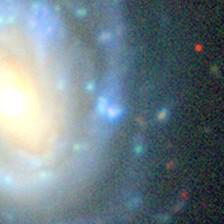

1237661358078427198    p_sat = 0.964
  RA = 175.32419    Dec = 47.69673


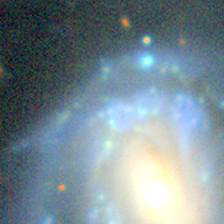

1237661358078427201    p_sat = 0.965
  RA = 175.32419    Dec = 47.68733


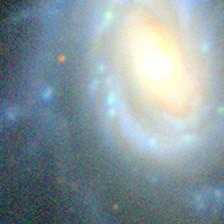

1237661358078427320    p_sat = 0.974
  RA = 175.25240    Dec = 47.52472


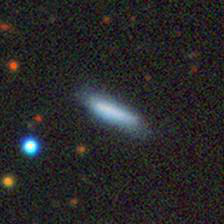

1237661358614970448    p_sat = 0.972
  RA = 174.15574    Dec = 47.83373


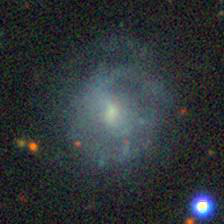

1237661358078558928    p_sat = 0.662
  RA = 175.86518    Dec = 47.62875


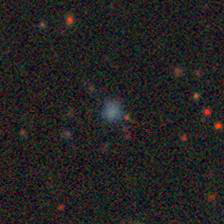

1237661358615035960    p_sat = 0.975
  RA = 174.45920    Dec = 47.88177


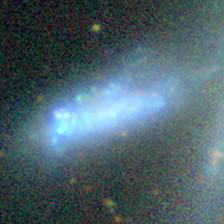

1237661358615035963    p_sat = 0.955
  RA = 174.42263    Dec = 47.91024


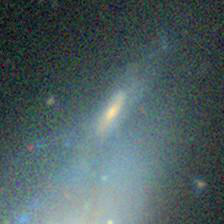

1237661358615035950    p_sat = 0.979
  RA = 174.43376    Dec = 47.89312


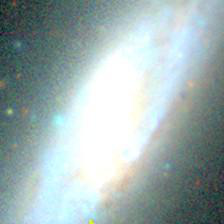

1237661358615035953    p_sat = 0.972
  RA = 174.43125    Dec = 47.89020


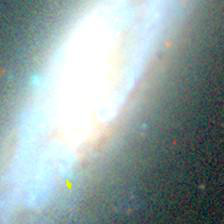

1237661358615035955    p_sat = 0.913
  RA = 174.46425    Dec = 47.88148


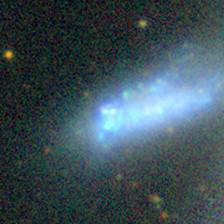

In [379]:
for objID, ra, dec, (_, p_sat) in zip(ngc3811_targets.objID, ngc3811_targets.ra, ngc3811_targets.dec, preds[0]):
    if p_sat > 0.5:
        print(objID + f'    p_sat = {p_sat.item():.3f}\n  RA = {ra:.5f}    Dec = {dec:.5f}')
        display(PILImage.create(f'../results/NSA_{nsaid}/images/{objID}.jpg'))

Not counting the host galaxy or any of the duplicates (all bright systems), we have 18 satellites out of 1496.